In [1]:
import tensorflow as tf
import numpy as np

mnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels), (test_images, test_labels) = \
    mnist.load_data()

training_images = np.expand_dims(training_images, axis=3)
training_images = training_images / 255.0

test_images = np.expand_dims(test_images, axis=3)
test_images = test_images / 255.0

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPool2D((2,2)),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units = 128, activation = 'relu'),
    tf.keras.layers.Dense(units=10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

model.fit(training_images, training_labels, epochs=5)
model.evaluate(test_images, test_labels)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               204928    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

[0.2653490918278694, 0.9018]

In [2]:
print(test_labels[:100])

[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 9 1 4 6 0 9 3 8 8 3 3 8 0 7
 5 7 9 6 1 3 7 6 7 2 1 2 2 4 4 5 8 2 2 8 4 8 0 7 7 8 5 1 1 2 3 9 8 7 0 2 6
 2 3 1 2 8 4 1 8 5 9 5 0 3 2 0 6 5 3 6 7 1 8 0 1 4 2]


In [4]:
model.predict(test_images[0].reshape(1, 28, 28, 1))

array([[1.6754245e-07, 3.4099932e-09, 3.9907147e-07, 9.0465413e-08,
        1.6831260e-07, 1.1699807e-05, 1.2064321e-08, 2.7745601e-04,
        7.3859951e-08, 9.9970990e-01]], dtype=float32)

In [33]:
class myCallBacks(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if (logs.get('accuracy') > 0.9):
            print("Reach 90% accuracy so cancelling training")
            self.model.stop_training = True 

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

FIRST_IMAGE=0
SECOND_IMAGE=23
THIRD_IMAGE=28
CONVOLUTION_NUMBER = 1

layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)

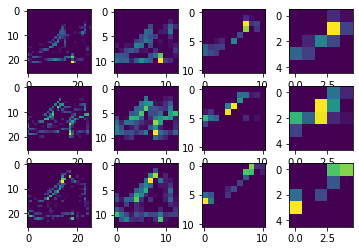

In [30]:
fig, ax = plt.subplots(3, 4)
for i in range(4):
    output1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1, 28, 28, 1))[i]
    ax[0, i].imshow(output1[0, :, :, CONVOLUTION_NUMBER])
    
    output2 = activation_model.predict(test_images[SECOND_IMAGE].reshape(1, 28, 28, 1))[i]
    ax[1, i].imshow(output2[0, :, :, CONVOLUTION_NUMBER])
    
    output3 = activation_model.predict(test_images[THIRD_IMAGE].reshape(1, 28, 28, 1))[i]
    ax[2, i].imshow(output3[0, :, :, CONVOLUTION_NUMBER])

plt.show()

In [31]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPool2D((2,2)),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units = 128, activation = 'relu'),
    tf.keras.layers.Dense(units=10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

model.fit(training_images, training_labels, epochs=5)
model.evaluate(test_images, test_labels)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               102528    
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

[0.25809447499513627, 0.9069]

In [34]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(128, (3,3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPool2D((2,2)),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units = 128, activation = 'relu'),
    tf.keras.layers.Dense(units=10, activation='softmax')
])

custom_callbacks = myCallBacks()

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

model.fit(training_images, training_labels, epochs=5, callbacks=[custom_callbacks])
model.evaluate(test_images, test_labels)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 128)       1280      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 128)       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 128)       147584    
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 128)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 3200)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               409728    
_________________________________________________________________
dense_5 (Dense)              (None, 10)               

[0.2655281801700592, 0.9044]